# Práctica 2: Limpieza y validación de los datos

####                                           Francisco Ramirez Fominaya   -    6 de enero de 2019

## Indice

- 1.- Descripción del dataset.
- 2.- Integración y selección de los datos de interés a analizar.
- 3.- Limpieza de los datos. 
- 4.- Análisis de los datos.
- 5.- Representación de los resultados a partir de tablas y gráficas.
- 6.- Resolución del problema. Conclusiones
- 7.- Código

## 1.- Descripción del dataset.

Este dataset está relacionado con las variantes rojas del vino portugués "Vinho Verde" de la región noroeste, llamada Minho, de Portugal. Para más detalles, consultar la referencia [Cortez et al., 2009](http://www3.dsi.uminho.pt/pcortez/wine/). Debido a cuestiones de privacidad y logística, solo están disponibles las variables fisicoquímicas (entradas) y sensoriales (la salida) (por ejemplo, no contempla datos sobre tipos de uva, marca de vino, precio de venta del vino, etc.).

Se considera un conjunto de datos grande en esta área. Las clases están ordenadas y no son equilibradas (por ejemplo, hay vinos mucho más normales que excelentes o pobres).

El conjunto de datos objeto de análisis se ha obtenido a partir de este enlace en en el repositorio de aprendizaje automático de la [UCI](https://archive.ics.uci.edu/ml/datasets/wine+quality) y está constituido por 12 atributos o características (columnas) que contiene 1.599 muestras (filas o registros). Entre los campos de este conjunto de datos, encontramos los siguientes:
- Atributos de entrada basado en pruebas fisicoquímicas: 
    - 1 - fixed acidity: acidez fija. La mayoría de los ácidos involucrados con el vino no son  volátiles (no se evaporan fácilmente).
    - 2 - volatile acidity: acidez volátil. La cantidad de ácido acético en el vino, que en niveles demasiado altos puede llevar a un sabor desagradable a vinagre.
    - 3 - citric acid: ácido cítrico. En pequeñas cantidades, el ácido cítrico puede agregar 'frescura' y sabor a los vinos. Además, ensalza las características aromáticas afrutadas.
    - 4 - residual sugar: azucar residual. Es la cantidad de azúcar restante después de que se detiene la fermentación, es raro encontrar vinos con menos de 1 gramo / litro y los vinos con más de 45 gramos / litro se consideran dulces.
    - 5 - chlorides: cloruros. La cantidad de sal en el vino.
    - 6 - free sulfur dioxide: dióxido de azufre libre. La forma libre de SO2 existe en equilibrio entre el SO2 molecular (como un gas disuelto) y el ión bisulfito. Previene el crecimiento microbiano y la oxidación del vino.
    - 7 - total sulfur dioxide: dióxido de azufre total. Es la cantidad de formas libres y ligadas de S02. En bajas concentraciones, el SO2 es mayormente indetectable en el vino, pero a concentraciones de SO2 libres superiores a 50 ppm, el SO2 se hace evidente en la nariz y el sabor del vino.
    - 8 - density: densidad. La densidad es cercana a la del agua según el porcentaje de alcohol y contenido de azúcar.
    - 9 - pH: pH. Describe qué tan ácido o básico es un vino en una escala de 0 (muy ácido) a 14 (muy básico); La mayoría de los vinos están entre 3-4 en la escala de pH.
    - 10 - sulphates: sulfatos. Es un aditivo para el vino que puede contribuir a los niveles de gas de dióxido de azufre (S02), que actúa como un antimicrobiano y antioxidante.
    - 11 - alcohol: alcohol. Es el porcentaje de alcohol del vino.
- Atributos de salida basado en datos sensoriales (valoracion de personas): 
    - 12 - quality: calidad (puntuación entre 0 y 10)

Todos los atributos tienen valores continuos a excepcion de 'quality' que es una variable discreta.


### Interés del análisis de este datadet

**El análisis de estos datos es interesante para analizar la posibilidad de establecer la relacion entre las preferencias de las personas (valoracion del vino) y las caracteristicas fisicoquímicas que se obtienen de pruebas analíticas fácilmente disponibles cuando se certifica el producto.** 

**Este análisis pueden tener una gran relevancia en cualquier actividad relacionada con el consumo del vino. Un ejemplo puede ser cuando un restaurante se plantea la compra de vinos que no conoce, tambien para validar la objetividad en la clasificacion de los vinos por parte de revistas especializadas, mejorar la producción de vino o para apoyar al enólogo.en las evaluaciones de cata de vinos, etc...** 



Fuente:
Paulo Cortez, University of Minho, Guimarães, Portugal, http://www3.dsi.uminho.pt/pcortez 
A. Cerdeira, F. Almeida, T. Matos and J. Reis, Viticulture Commission of the Vinho Verde Region(CVRVV), Porto, Portugal @2009

## 2.- Integración y selección de los datos de interés a analizar.

Una vez descrito el dataset, necesitamos observar las características principales de los datos que utilizaremos en este estudio. Conocer los datos con los que trabajaremos nos ayudará después en la creación de modelos y la validación de hipótesis.

### 2.1. Análisis exploratorio inicial  


En primer lugar vamos a cargar los datos objeto de analisis y vamos a obtener la informacion general sobre sus atributos, de forma que seamos capacer de identificar los primeros problemas con los que nos podemos encontrar y sus caracteristicas más generales.

A estos efectos vamos a crear un objeto "data.frame" llamado 'wine1' que contendrá todos los datos del dataset objeto de análisis. 


In [176]:
# Importamos las librerias que vamos a necesitar.
import pandas as pd

# Creamos un dataframe con los datos a analizar
wine = pd.read_csv('data/winequality-red.csv')
# Visualizamos los 5 primeros registros con las cabeceras para confirmar la informacion
# anterior y observar si vemos algo que nos llame la atención.
wine.head(n=5)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


De acuerdo con la observacion inicial de los 100 primeros registros, no aprecio situaciones de destacar muy evidentes. Tan sólo vamos a destacar 2 observaciones:
- `me ha llamado la atencion el valor '0' en la columna 'citric acid', ya que podría tratarse de un valor perdido que haya sido posteriormente completado con el valor '0'`. No obstante, no hay documentacion en tal sentido, y en base a la descripcion del atributo, sabemos que se utiliza en pequeñas cantidades, por lo que no seria descabellado pensar que en algunas muestras, los analisis dieran un valor inapreciable. No obstante, estareos atentos a cualquier situación que nos haga dudar de este valor.
- El nombre de `algunas columnas tienen espacios vacios` y esto nos puede dar problemas a la hora hora de programar con Python. Tendermos esto en cuenta para posteriormente corregir esta situación.


Vamos a obtener algunos datos adicionales exploratorios de carácter general para confirmar información recogida y conocer nuevas características.

In [177]:
# Vamos a obtener algunos datos muy básicos de carácter exploratorio:
print("Forma del dataset (nº muestras/filas, nº atributos/columnas): {s}").format(s = wine.shape)
print("Nombre de los atributos (columnas): {s}").format(s = list(wine))

Forma del dataset (nº muestras/filas, nº atributos/columnas): (1599, 12)
Nombre de los atributos (columnas): ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


In [178]:
# Información sobre las columnas de datos (atributos o variables).
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


De acuerdo con la informacion de la columna de datos, vemos 2 consideraciones importantes:
- Que todas las columnas son de tipo numérico (float64(11) y int64(1)), lo que nos `permite aplicar fácilmente ciertos análisis muy útiles` para comprobar caracteristicas y posibles relaciones entre variables.
- Todas las columnas están definidas como 'non-null', lo que `imposibilita que una columna pueda contener un valor nulo`. 

Aunque esta última consideración la comprobaremos posteriormente, `nos induce a pensar que los valores '0' encontrados en el atributo 'citric acid' puedan corresponder a valores originalmente nulos transformados al valor '0' para poder guardarse en este dataset`. Esta consideracion es suficientemente razonable como para tenerla en cuenta posteriormente en la sección de limpieza de datos.  

In [179]:
# Vamos a ver los estadísticos básicos de los atributos numéricas del dataframe original, que son todos
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


De acuerdo con la información estadistica básica podemos observar:
- `El único atributo que contiene algun valor 0 es` '**citric acid**', ya que al margen de haberlo visualizado anteriormente, vemos que es el único atributo que contiene como valor mínimo el '0' en un conjunto de datos en donde todos los valores son mayores o iguales a '0'. Por lo tanto, `la única posibilidad de que pudieran darse valores perdidos se reduce al atributo 'citric acid'`. 
- `Los valores altos de la acidez volatil` ('**volatile acidity**') implica una alta cantidad de ácido acético en el vino, que puede llevar a un sabor desagradable a vinagre. De acuerdo con los estadísticos básicos, el valor maximo supone el triple que la media aproximadamente, lo que nos hace pensar que existen muestras con valores muy altos. Debido a la influencia de este atributo en la variable dependiente, `podría suceder que afectara negativamente al estudio de  la influencia real de otros atributos sobre la calidad del vino ('quality')`. Por este motivo, deberiamos prestar especial atención por si nos encontremos en una situación de valores extremos que debamos excluir del análisis.
- Los indicadores de '**residual sugar**' y '**pH**' se encuentran dentro de los limites de los vinos normales.  
- Las puntuaciones sobre la calidad del vino ('**quality**') se concentran entre los valores 3 y 8. 
- El dioxido de azufre libre ('**free sulfur dioxide**') en cantidades superiores a 50 ppm, se hace evidente en nariz y en el sabor del vino. La información del dataset no dice nada con relacion a la unidad de medida de los datos que contempla este atributo, por lo que no tenemos certeza de si podemos utilizar el límite de 50 ppm para aplicarlo a nuestro análisis. Además existe una alta dispersión entre sus valores, lo que puede dificultar analizar su relación con la variable dependiente. 
- Varios de los atributos presenta una dispersión alta en cuanto a sus valores.



### 2.2. Características de los atributos atributos  

Para entender mejor algunos datos, vamos a observar el histograma de la varaible dependiente ('quality'), que tiene valores discretos, para conocerla algo más a traves de la distibución de sus valores.

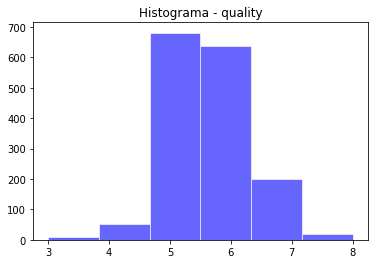

La cantidas de muestras agrupadas por valor de "quality" son:
La cantidas de muestras agrupadas por valor de "quality" son:


5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [180]:
# En este caso es interesante conocer la frecuencia con la que se distribuyen sus valores
import matplotlib.pyplot as plt

plt.hist(wine['quality'], bins=6, facecolor='blue', edgecolor = 'white', alpha=0.6, linewidth=1)
plt.title('Histograma - quality')
plt.grid(False)
plt.show()

print 'La cantidas de muestras agrupadas por valor de "quality" son:'
print 'La cantidas de muestras agrupadas por valor de "quality" son:'
wine.quality.value_counts()

De acuerdo con la distribución de los valores del atributo 'quality' de las distintas muestras, plantemos crear una nueva columna que considere el valor por 3 rangos posibles, de forma que analicemos posteriormente los estadísticos básicos para ver si mejoran algunos parámetros.

Los 3 rangos a crear son:
- Menor que 5 le asignaremos el valor 'malo'
- Entre 5 y 6 ambos incluidos, le asignaremos el valor 'normal'
- Mayor que 6 le asignaremos el valor 'bueno'

En el siguiente apartado procederemos a modificar el dataframe con este nuevo criterio.

### 2.3. Integración y transformación de datos  

De acuerdo con toda la información obtenida hasta el momento, vamos a destacar las siguientes consideraciones:
- Lo primero, vamos a eliminar los campos en blanco del nombre de los atributos para poder operar sin problemas en los análisis que necesitemos desarrollar. Para ello sustituiremos el valor ' ' (blanco) por '_'.
- Los valores de los distintos atributos parecen homogeneos, por lo que no consideramos que haya que realizar ningún ajuste para eliminar la mezcla de valores heterogéneos.
- Como hemos visto antes, vamos a crear un nuevo campo, llamado 'valoracion' que a contemplar el rango de valores en el que vamos a agrupar el atributo 'quality'.
- Posteriormente, tras realizar estos cambios, analizaremos los estadisticos básicos para comprobar sus valores.



In [181]:
# Cambiamos el nombre de los campos que tienen espacios en blanco.
wine = wine.rename(columns = {'fixed acidity': 'fixed_acidity',
                                'volatile acidity': 'volatile_acidity',
                                'citric acid': 'citric_acid',
                                'residual sugar': 'residual_sugar',
                                'free sulfur dioxide': 'free_sulfur_dioxide',
                                'total sulfur dioxide': 'total_sulfur_dioxide',
                                })
print list(wine)


['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


In [182]:
# Vamos a crear un nuevo campo de acuerdo con el rango que agrupa los valores de 'quality':

group_names = ['malo', 'medio', 'bueno']
wine["valoracion"] = pd.cut(wine1["quality"], 3, labels = group_names)
wine.valoracion.value_counts()


medio    1319
bueno     217
malo       63
Name: valoracion, dtype: int64

In [183]:
# Vamoa a ver los valores medios de los atributos agrupados por los valores del campo 'valoracion'. 
# De esta forma podremos ver posibles nuevas conclusiones.

wine.groupby('valoracion').mean()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
valoracion,,,,,,,,,,,,
malo,7.871429,0.724206,0.173651,2.684921,0.095730,12.063492,34.444444,0.996689,3.384127,0.592222,10.215873,3.841270
medio,8.254284,0.538560,0.258264,2.503867,0.088973,16.368461,48.946929,0.996867,3.311296,0.647263,10.252717,5.483700
bueno,8.847005,0.405530,0.376498,2.708756,0.075912,13.981567,34.889401,0.996030,3.288802,0.743456,11.518049,7.082949


A excepcion de dos atributos('free_sulfur_dioxide' y 'total_sulfur_dioxide'), cuyos datos estadisticos básicos le otorgaban un dispersión muy elevada, el resto guardan una relación creciente o decreciente de sus valores medios agrupados por el nuevo atributo 'valoración'. Esto nos hace pensar, a priori, que ha sido una buena transformación. 

## 3.- Limpieza de los datos.

### 3.1. Análisis de valores perdidos.  ¿Los datos contienen ceros o elementos vacíos? ¿Cómo gestionarías cada uno de estos casos?  


De acuerdo con todo lo analizado hasta el momento, hemos de resaltar 2 consideraciones con relacion a los valores perddidos: 
- Este dataser no debería tener valores nulos porque todos los atributos están definidos como 'non-null' y por tanto no podrían guardarse (no obstante lo confirmaremos).
- La exitencia de valores '0' que encubran valores nulos sólo se pueden dar en la propiedad 'citric acid', ya que:
 - todos los valores contemplados en este dataset son de tipo numérico y sólo positivos. 
 - y de acuerdo con los estadisticos básicos, el único atributo que tiene un valor minimo igual a '0' es este atributo.

In [184]:
# Comprobacion de la existencia de valores nulos.
# Para cada columna del dataframe nos indica si hay algun registro nulo
print wine.isnull().any()   



fixed_acidity           False
volatile_acidity        False
citric_acid             False
residual_sugar          False
chlorides               False
free_sulfur_dioxide     False
total_sulfur_dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
valoracion              False
dtype: bool


In [185]:
# Vamos a ver cuantos valores igual a '0' tiene el atributo 'citric acid'
ca0 = wine[wine1.citric_acid == 0]
print 'El numero de muestras con valor 0 en el atributo "citric acid" son:', len(ca0)
print 'El porcentaje de valores 0 sobre el total de las muestras es de: ', (float(len(ca0))/float(len(wine))*100)
print ''
print 'La distribucion en % de los valores "0" entre los valores del atributo"valoracion" es:'
print ca0.valoracion.value_counts()/wine1.valoracion.value_counts()*100


El numero de muestras con valor 0 en el atributo "citric acid" son: 0
El porcentaje de valores 0 sobre el total de las muestras es de:  0.0

La distribucion en % de los valores "0" entre los valores del atributo"valoracion" es:
bueno    0.0
malo     0.0
medio    0.0
Name: valoracion, dtype: float64


De acuerdo con expertos en este negocio, el carácter ácido del vino marca una de las características más importantes de la fase gustativa del análisis sensorial: el equilibrio ácido-dulce en vinos. Uno de estos ácidos es el acido cítrico ('citric acid') que se encuentra de forma natural en ellos, sobre todo en aquellos que no han realizado la fermentación maloláctica.

Dada la importancia de la acidez en el vino y del porcentaje de los valores 0 en el atributo 'citric_acid' que supone un 8,25% (porcentaje significativo) y su distinta distribucion entre el rango de datos del atributo 'valoracion', vamos a transformar dichos valores de acuerdo con un criterio que aporte informacion razonable, ya que de lo contrario, dichos valores consideramos que producirán un efecto negativo en el análisis, ya que considero que en realidad esconden valores nulos. 



In [186]:
# Sustituimos los valores '0' del atributo 'citric_acid' por su media 

media = wine['citric_acid'].mean() 
wine['citric_acid'] = wine1.citric_acid.mask(wine.citric_acid == 0, media) 
wine['citric_acid'].describe()

count    1599.000000
mean        0.293345
std         0.177148
min         0.010000
25%         0.150000
50%         0.270976
75%         0.420000
max         1.000000
Name: citric_acid, dtype: float64

### 3.2.  Identificación y tratamiento de valores extremos.  

Vamos a centrar el análisis de valores extremos en aquellos atributos en que el valor máximo supere 3 veces la desviacion estandard. 

## 4.- Análisis de los datos.

- 4.1.  Selección de los grupos de datos que se quieren analizar/comparar (planificación de los análisis a aplicar).  
- 4.2.  Comprobación de la normalidad y homogeneidad de la varianza.  
- 4.3.  Aplicación de pruebas estadísticas para comparar los grupos de datos. En función de los datos y el objetivo del estudio, aplicar pruebas de contraste de  hipótesis, correlaciones, regresiones, etc. 

### 4.1. Selección de los grupos de datos que se quieren analizar/comparar.  

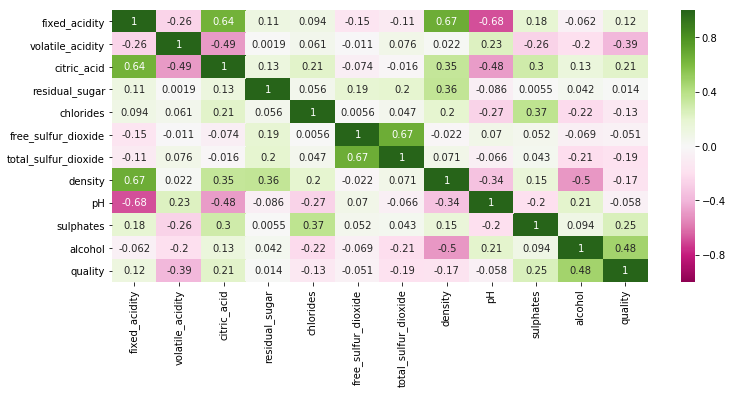

In [187]:
# Lo primero necesitamos analizar la correlación entre las variable dependiente 'quality' e independientes. 
# Relacion entre todas las variables

correlacion = wine.corr(method = 'pearson')
plt.figure(figsize=(12, 5))
sns.heatmap(correlacion, annot=True, linewidths=0, vmin=-1, cmap="PiYG")


In [188]:
correlation['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric_acid             0.213425
fixed_acidity           0.124052
residual_sugar          0.013732
free_sulfur_dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total_sulfur_dioxide   -0.185100
volatile_acidity       -0.390558
Name: quality, dtype: float64

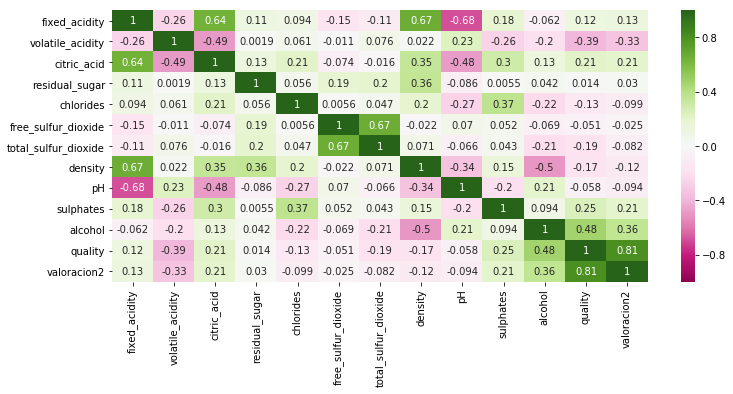

In [189]:
# Lo segundo necesitamos analizar la correlación entre las variable dependiente 'valoración' e independientes. 
# Para ello necesitamos convertir los valores no númericos en númericos

# Ahora convertimos a numericos los valores del atributo 'valoracion' en el nuevo atributo 'valoracion2'
wine["valoracion2"] = wine["valoracion"].astype('category').cat.codes
# Calculamos la correlación
correlacion = wine.corr(method = 'pearson')
plt.figure(figsize=(12, 5))
sns.heatmap(correlacion, annot=True, linewidths=0, vmin=-1, cmap="PiYG")

Los resultados indican una fuerte correlación entre el atributo 'quality' y 'valoracion', cosa que ya imaginábamos, pero no aporta valor con relacion a la correlación de los demas atributos (variables independientes) 

Los resultados del análisis de correlación realizado indica que aunque los índices de correlación no son muy fuertes, los atributos con mayor correlación con 'quality' son los siguientes (ordenados de mayor a menor fuerza): 
- 'alcohol'. Tiene una relacion positiva (1)
- 'volatile acidity'. Tiene una relacion negativa (2)
- 'citric acid'. Tiene una relacion positiva (1)
- 'sulphates'. Tiene una relacion positiva (1)

  - (1) Son las variables independientes que tienen una relacion positiva con la variable dependiente, es decir, que crecen a medida que crece esta última.
  - (2) Son las variables independientes que tienen una relacion negativa con la variable dependiente, es decir, que decrecen a medida que crece esta última.

Como consecuencia del punto anterior, los atributos en los que nos vamos a centrar en el analisis posterior, y que asignaré a un nuevo dataframe llamado wine2, son:
- 'alcohol'.
- 'volatile acidity'. 
- 'citric acid'. 
- 'sulphates'.
- 'quality'
- 'valoracion'

Vamoa a examinar más a fondo estos atributos para la exploración detallada de patrones y de la correlación. Por lo tanto, usaremos solo estas 4 variables independientes en nuestro análisis futuro.

In [190]:
# Creo un nuevo dataframe con las columnas de interés definas anteriormente
wine2 = wine1[['volatile_acidity', 'citric_acid',
               'sulphates', 'alcohol', 'quality', 'valoracion']]
# Mostramos las 3 primeras filas con la cabecera
wine2.head(n=3)

,volatile_acidity,citric_acid,sulphates,alcohol,quality,valoracion
0,0.70,0.270976,0.56,9.4,5,medio
1,0.88,0.270976,0.68,9.8,5,medio
2,0.76,0.040000,0.65,9.8,5,medio


# El 'volatile acidity': acidez volátil. La cantidad de ácido acético en el vino, que en niveles demasiado altos puede llevar a un sabor desagradable a vinagre.

### 4.2. Comprobación de la normalidad y homogeneidad de la varianza.  

#### Vamos a analizar en primer lugar la relacion entre el 'alcohol' y la 'quality'

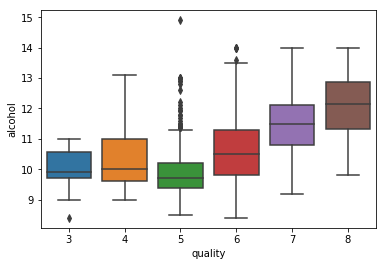

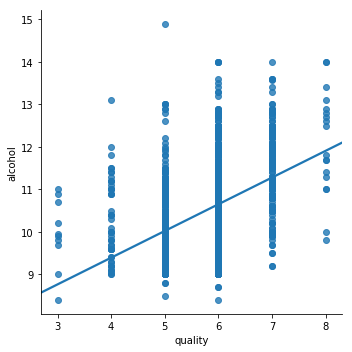

In [191]:
# Realizamos un analisis visual con la libreria Seaborn.
from seaborn import boxplot

boxplot(x = 'quality', y = 'alcohol', data = wine2)
lmplot('quality', 'alcohol', data=wine2, ci=None)


Como podemos ver el nivel de alcohol aumenta con la calidad del vino, pero con mayor dispersion en los extremos. Se aprecian algunos valores extremos sobre todo en valores de calidad media.

#### Vamos a analizar ahora la relacion entre el 'volatile_acidity' y la 'quality'

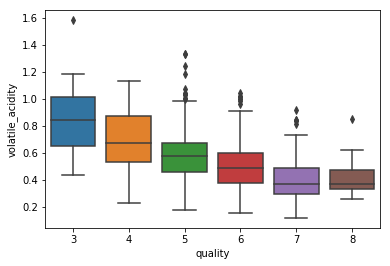

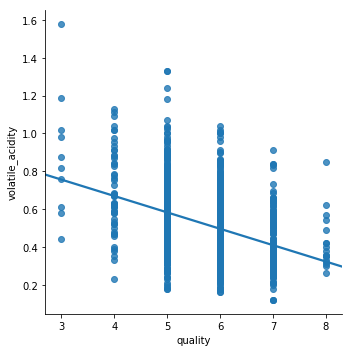

In [192]:
# Realizamos un analisis visual con la libreria Seaborn.
boxplot(x = "quality", y = 'volatile_acidity', data = wine2)
lmplot('quality', 'volatile_acidity', data=wine2, ci=None)


Como podemos apreciar, hay una clara tendencia descendente en la acidez volátil a medida que aumentamos la calidad, con una mayor dispersion en los extremos. Se aprecian algunos valores extremos sobre todo en valores de calidad media.

#### Vamos a analizar ahora la relacion entre el 'citric acid' y la 'quality'

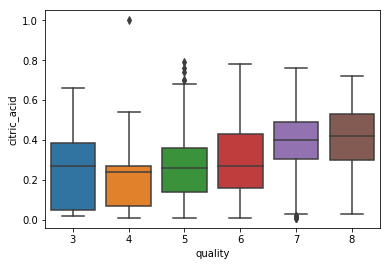

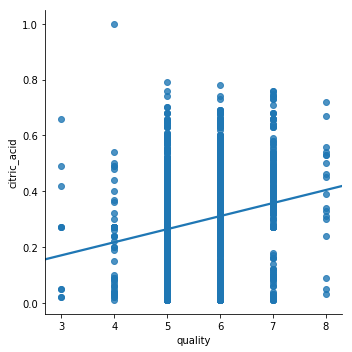

In [193]:
# Realizamos un analisis visual con la libreria Seaborn.
boxplot(x = "quality", y = 'citric_acid', data = wine2)
lmplot('quality', 'citric_acid', data=wine2, ci=None)

Como podemos apreciar, hay una clara tendencia ascendente en la acido cítrico a medida que aumentamos la calidad, con mayor dispersion en los extremos. Se aprecian algunos valores extremos sobre todo en valores de calidad media.

#### Vamos a analizar ahora la relacion entre el 'sulphates' y la 'quality'

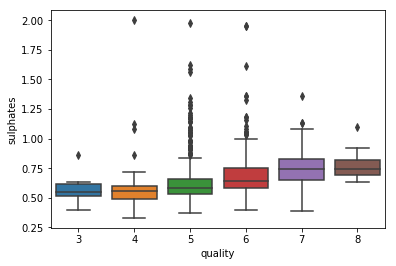

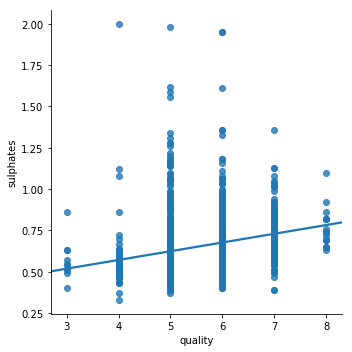

In [194]:
# Realizamos un analisis visual con la libreria Seaborn.
boxplot(x = "quality", y = 'sulphates', data = wine2)
lmplot('quality', 'sulphates', data=wine2, ci=None)

Como podemos ver el nivel de sulfatos aumenta ligeramente con la calidad del vino, con mayor dispersion en los extremos. Se aprecian algunos valores extremos sobre todo en valores de calidad media.

#### Vamos a analizar ahora la relacion entre el 'alcohol' y el 'residual sugar' en los distintos rangos de calidad, ya que por indicacion de los expertos del sector es una de los equilibrios más importantes para la calidad del vino.

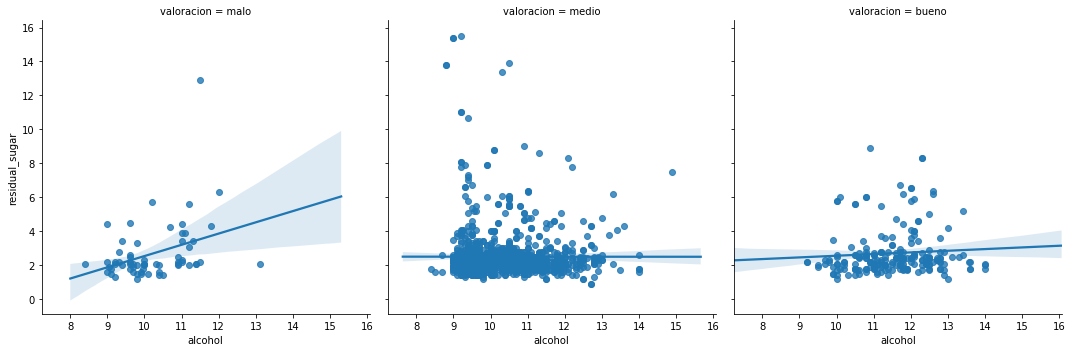

In [195]:
lmplot(x = 'alcohol', y = 'residual_sugar', col = 'valoracion', data = wine1)

Se aprecia que no existe una relación directa entre el alcohol y el azucar residual en el rango de vinos de calidad, mientras que si que existe una relacion creciente entre estos dos atributos en vinos de baja calidad.

**De acuerdo con los resultados obtenidos, vamos a proceder a normalizar los datos para contrarrestar los efectos de una correlacion discreta y de algunos valores extremos en torno a los valores medios de los rangos de calidad**

In [196]:
# Importamos StandardScaler del módulo de preprocesamiento de la librería sklearn.
from sklearn.preprocessing import StandardScaler

# Utilizamos el StandardScaler de sklearn para normalizar los valores de cada atributo.
wine2.loc[:, ["alcohol"]] = StandardScaler().fit_transform(wine2.loc[:, ["alcohol"]])
wine2.loc[:, ["volatile_acidity"]] = StandardScaler().fit_transform(wine2.loc[:, ["volatile_acidity"]])
wine2.loc[:, ["citric_acid"]] = StandardScaler().fit_transform(wine2.loc[:, ["citric_acid"]])
wine2.loc[:, ["quality"]] = StandardScaler().fit_transform(wine2.loc[:, ["quality"]])
 
    
wine2.describe()

,volatile_acidity,citric_acid,sulphates,alcohol,quality
count,1.599000e+03,1.599000e+03,1599.000000,1.599000e+03,1.599000e+03
mean,1.699704e-16,6.457207e-17,0.658149,9.437243e-16,-8.051373e-16
std,1.000313e+00,1.000313e+00,0.169507,1.000313e+00,1.000313e+00
min,-2.278280e+00,-1.599983e+00,0.330000,-1.898919e+00,-3.265165e+00
25%,-7.699311e-01,-8.094359e-01,0.550000,-8.663789e-01,-7.878226e-01
50%,-4.368911e-02,-1.263151e-01,0.620000,-2.093081e-01,4.508484e-01
75%,6.266881e-01,7.151905e-01,0.730000,6.354971e-01,4.508484e-01
max,5.877976e+00,3.990314e+00,2.000000,4.202453e+00,2.928190e+00


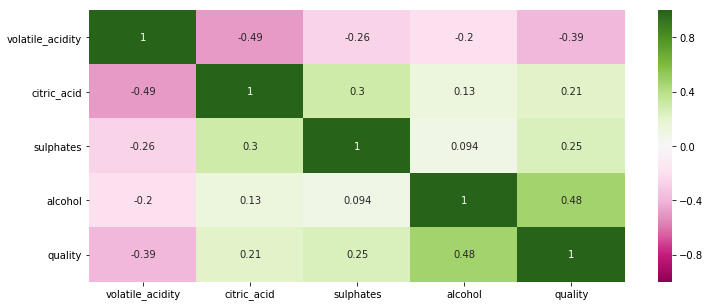

In [197]:
# Calculamos la nueva correlación, que no debe diferir de la primera si la transformacion se ha hecho correctamente 
correlacion = wine2.corr(method = 'pearson')
plt.figure(figsize=(12, 5))
sns.heatmap(correlacion, annot=True, linewidths=0, vmin=-1, cmap="PiYG")

De esta manera, como podemos ver, para cada atributo hemos centrado los valores para que su media se encuentre cercana a cero y escalarlos para que la varianza sea 1. Esto se ha cumplido en todos los atributos a excepcion de los 'sulphates'. Con estos valores vamos a aplicar distintos análisis

### 4.3. Aplicación de pruebas estadísticas para comparar los grupos de datos. 

In [198]:
# Cálculo de regresión

import statsmodels.formula.api as smf
from patsy import dmatrices

y,X = dmatrices('quality ~ alcohol', data=wine2, return_type='dataframe')
print("X:", type(X))
print(X.columns)
model=smf.OLS(y, X)
result=model.fit()
result.summary()

('X:', <class 'pandas.core.frame.DataFrame'>)
Index([u'Intercept', u'alcohol'], dtype='object')


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     468.3
Date:                Mon, 07 Jan 2019   Prob (F-statistic):           2.83e-91
Time:                        23:09:30   Log-Likelihood:                -2063.3
No. Observations:                1599   AIC:                             4131.
Df Residuals:                    1597   BIC:                             4141.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.463e-16      0.022   1.12e-14      1.000      -0.043       0.043
alcohol        0.4762      0.022     21.639      0.000       0.433       0.519
==============================================================================
Omnibus:                       38.501   Durbin-Watson:                   1.748
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               71.758
Skew:                          -0.154   Prob(JB):                     2.62e-16
Kurtosis:                       3.991   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [199]:
model = smf.OLS.from_formula('quality ~ alcohol', data = wine)
results = model.fit()
print(results.params)

Intercept    1.874975
alcohol      0.360842
dtype: float64


El resultado anterior del modelo de regresión de la calidad del vino frente al contenido de alcohol muestra que el valor mínimo para la calidad es de 1.87 y habrá un incremento por unidad de la calidad del vino por cada cambio de 0.360842 unidades de alcohol.

## 5.- Representación de los resultados a partir de tablas y gráficas.

### Clasificación

#### Clasificación utilizando Statsmodel:

Usaremos statsmodel para el análisis de regresión logística para predecir la buena calidad del vino (> 4).
Vamos a crear una nueva variable / columna categórica (valor) con dos valores posibles (bueno = 1 & malo = 0).

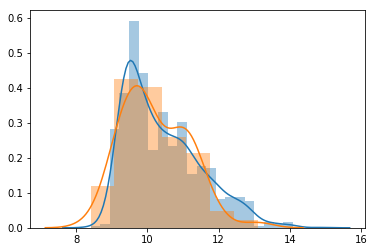

In [200]:
import statsmodels.api as sm

wine1['valor'] = (wine1['quality'] > 4).astype(np.float32)
y, X = dmatrices('valor ~ alcohol', data = wine1)
sns.distplot(X[y[:,0] > 0, 1])
sns.distplot(X[y[:,0] == 0, 1])

La gráfica anterior muestra que la mayor probabilidad de que la calidad del vino tinto sea buena es si el porcentaje de alcohol esta en torno a 12, mientras que la misma probabilidad se reduce a medida que el porcentaje de alcohol disminuye.

In [201]:
model = smf.Logit(y, X)
result = model.fit()
result.summary2()

Optimization terminated successfully.
         Current function value: 0.165209
         Iterations 8


<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Logit
===============================================================
Model:              Logit            Pseudo R-squared: 0.005   
Dependent Variable: valor            AIC:              532.3386
Date:               2019-01-07 23:09 BIC:              543.0928
No. Observations:   1599             Log-Likelihood:   -264.17 
Df Model:           1                LL-Null:          -265.48 
Df Residuals:       1597             LLR p-value:      0.10487 
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     8.0000                                     
----------------------------------------------------------------
               Coef.   Std.Err.    z     P>|z|    [0.025  0.975]
----------------------------------------------------------------
Intercept      1.0456    1.3628  0.7673  0.4429  -1.6253  3.7166
alcohol        0.2082    0.1327  1.5685  0.1168  -0.0519  0.4683
===============================================================

"""

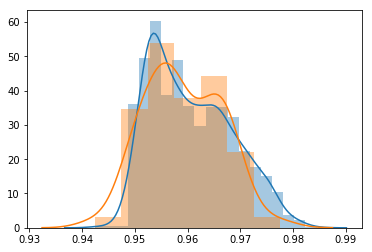

In [202]:
yhat = result.predict(X)
sns.distplot(yhat[y[:,0] > 0])
sns.distplot(yhat[y[:,0] == 0])

In [203]:
import sklearn

yhat = result.predict(X) > 0.955
print(sklearn.metrics.classification_report(y, yhat))

              precision    recall  f1-score   support

         0.0       0.04      0.32      0.07        63
         1.0       0.96      0.69      0.80      1536

   micro avg       0.67      0.67      0.67      1599
   macro avg       0.50      0.50      0.44      1599
weighted avg       0.92      0.67      0.77      1599



La gráfica de distribución anterior muestra los resultados superpuestos de las muestras de buena y mala calidad del vino.

Podemos observar que la precisión para la predicción del buen vino es casi exacta en un 96%, mientras que para el vino malo es solo el 4%, lo cual no es bueno. Pero en general, hay un 92% de precisión promedio en la predicción de la tasa de calidad del vino.

#### Classification using Sklearn's RandomForestClassifier.


In [208]:
import sklearn
import sklearn.metrics
from sklearn import ensemble
from sklearn import linear_model
from patsy import dmatrices

y, X = dmatrices('valoracion ~ alcohol', data = wine2)
model = sklearn.ensemble.RandomForestClassifier()
model.fit(X, y)
yhat = model.predict(X)
print(sklearn.metrics.classification_report(y, yhat))

              precision    recall  f1-score   support

           0       1.00      0.03      0.06        63
           1       0.85      0.97      0.91      1319
           2       0.57      0.19      0.29       217

   micro avg       0.83      0.83      0.83      1599
   macro avg       0.80      0.40      0.42      1599
weighted avg       0.82      0.83      0.79      1599
 samples avg       0.83      0.83      0.83      1599



- En este caso, con la matriz de precisión para el modelo el RandomForestClassifier de sklearn para la predicción de la calidad del vino tinto, podemos observar que los valores se han mejorado significativamente.
- La precisión para la predicción de vino de mala calidad (0) es casi del 100%, mientras que la precisión para la predicción de vino de buena calidad (1) es aproximadamente del del 96%.
- Este modelo de clasificador de sklearn también tiene una precisión general de alrededor del 96%, que es mucho mejor que el anterior

## 6.- Resolución del problema. Conclusiones

Aunque las conclusiones las he ido indicando a medida que desarrollaba el trabajo, voy a realizar una recopilacion de las cuestiones más importantes. 

- Observamos los factores clave que determinan y afectan la calidad del vino. La calidad del vino es, en última instancia, una medida subjetiva. El factor ordenado "quality" no fue muy útil y para superar esto, creamos otra variable llamada "valoración". La relación con la calidad del vino son: alcohol, acidez volatil, sulfatos, azúcar residual y acidez volátil. 
- Para hacer predicciones de la calidad del vino y de cualquier otro si fuera necesario, entrenamos dos modelos. Como se ve, el modelo stats y modelo de sklearn con el clasificador de bosque aleatorio. El clasificador de bosques aleatorios tuvo un rendimiento ligeramente mejor y decidimos seguirlo si tuviéramos que hacer más predicciones.
- El uso de este análisis ayudará a comprender si, al modificar las variables, es posible aumentar la calidad del vino en el mercado. Si puede controlar sus variables, entonces puede predecir la calidad de su vino y obtener más ganancias.

Como se menciona en todos los estudios que tratan
predicción de la calidad del vino, los resultados son realmente
Relevante para diferentes aspectos de la industria del vino.
Por un lado una buena predicción puede ser muy
Útil en la fase de certificación. Por otra parte,
Tal sistema de predicción también puede ser útil para
Formación de estudiantes de enología o de marketing.
fines

## 7.- Código

El codigo esta adjunto a lo largo de todo el trabajo.